In [16]:
from parcels import FieldSet, ParticleSet, JITParticle, AdvectionRK4, plotTrajectoriesFile, ErrorCode
from datetime import timedelta
import numpy as np
from scipy.io import netcdf
from netCDF4 import Dataset
import pandas as pd

from mpl_toolkits.basemap import Basemap


import urllib2
import StringIO
import csv
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pickle as pickle

import time

filenames = {'U': "../MITgcm_data/UV*.cdf",
             'V': "../MITgcm_data/UV*.cdf"}

In [3]:

variables = {'U': 'U',
             'V': 'V'}
dimensions = {'time': 'TIME1','depth': 'DEPTH_T1_4',
              'lat': 'LATITUDE_T',
              'lon': 'LONGITUDE_U'}

In [4]:
fieldset = FieldSet.from_netcdf(filenames, variables, dimensions)

In [5]:
def DeleteParticle(particle, fieldset, time, dt):
    particle.delete()

In [6]:
import random
from parcels import BrownianMotion2D, Field

In [7]:
fieldset.V.data.shape

(245, 4, 504, 876)

In [8]:
# Set diffusion constants.
kh_zonal = 100
kh_meridional = 100

# Create field of Kh_zonal and Kh_meridional, using same grid as U
grid_U = fieldset.U.grid

fieldset.add_field(Field('Kh_zonal', kh_zonal*np.ones(fieldset.U.data.shape), grid=grid_U))
fieldset.add_field(Field('Kh_meridional', kh_meridional*np.ones(fieldset.U.data.shape), grid=grid_U))

In [9]:
lat = [31.082, 29.152, 32.794, 30.900, 27.781, 27.952, 18.640, 29.661, 24.174, 21.020, 34.102, 33.462, 31.458, 32.024, 15.509, 18.906, 17.074, 16.555]
lon = [176.366, 191.072, 197.52, 193.91, 178.991, 194.899, 178.040, 208.099, 191.298, 187.602, 188.077, 181.109, 183.82, 179.190, 180.468, 189.375, 206.097, 190.914]

In [12]:
# number of times to repeat the particles
npart = 5

# Set random seed
random.seed(123456)

days = 50
runtime = timedelta(days=days)

random.seed(1234)
pset = ParticleSet(fieldset=fieldset, pclass=JITParticle,
                   lon=np.tile(lon,npart), lat=np.tile(lat,npart))
pset.execute(pset.Kernel(BrownianMotion2D),
             runtime=runtime,
             dt=timedelta(hours=1),
             recovery={ErrorCode.ErrorOutOfBounds: DeleteParticle},
             output_file=pset.ParticleFile(name="{}Drifters_Brownian_npart{}_{}_days".format(len(lat),npart,days), outputdt=timedelta(hours=1)))

INFO: Compiled JITParticleBrownianMotion2D ==> /var/folders/nj/pymsyw7n28qdntb958tl337c0000gp/T/parcels-502/e9f8098e345593a7ec0510b2f5bf2680.so


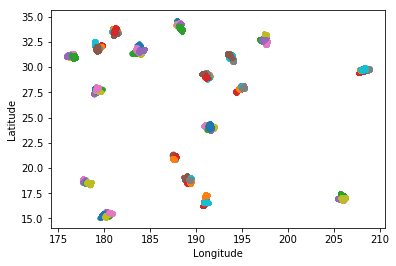

<module 'matplotlib.pyplot' from '/Users/mho/anaconda3/envs/py2_parcels/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [14]:
# plt.plot(lon,lat, 'bo', markersize=10)
plotTrajectoriesFile("18Drifters_Brownian_npart5_50_days.nc")


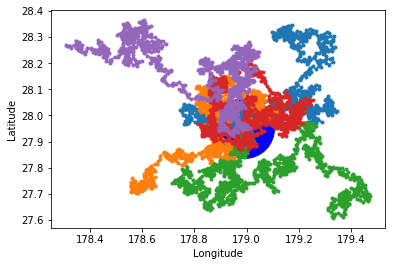

<module 'matplotlib.pyplot' from '/Users/mho/anaconda3/envs/py2_parcels/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [100]:
plt.plot(lon,lat, 'bo', markersize=60)
plotTrajectoriesFile("SingleDrifterBrownian_{}_50days.nc".format(6))


In [15]:
# Change diffusion constants.
kh_zonal = 10
kh_meridional = 10

# Create field of Kh_zonal and Kh_meridional, using same grid as U
grid_U = fieldset.U.grid

fieldset.add_field(Field('Kh_zonal', kh_zonal*np.ones(fieldset.U.data.shape), grid=grid_U))
fieldset.add_field(Field('Kh_meridional', kh_meridional*np.ones(fieldset.U.data.shape), grid=grid_U))

In [25]:
now = time.time()
# number of times to repeat the particles
npart = 5

# Set random seed
random.seed(123456)

days = 50
runtime = timedelta(days=days)

random.seed(1234)
pset = ParticleSet(fieldset=fieldset, pclass=JITParticle,
                   lon=np.tile(lon,npart), lat=np.tile(lat,npart))
pset.execute(pset.Kernel(BrownianMotion2D),
             runtime=runtime,
             dt=timedelta(hours=1),
             recovery={ErrorCode.ErrorOutOfBounds: DeleteParticle},
             output_file=pset.ParticleFile(name="{}Drifters_Brownian_npart{}_{}_days_10kh".format(len(lat),npart,days), outputdt=timedelta(hours=1)))
time_elapsed = time.time()-now
print('time elapsed (s): ', time_elapsed)

INFO: Compiled JITParticleBrownianMotion2D ==> /var/folders/nj/pymsyw7n28qdntb958tl337c0000gp/T/parcels-502/378546da08ec73a93cd22469dd3a15fa.so


('time elapsed (s): ', 17.8385808467865)


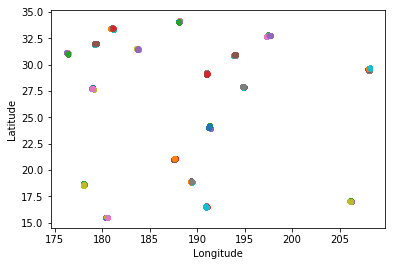

<module 'matplotlib.pyplot' from '/Users/mho/anaconda3/envs/py2_parcels/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [30]:
# plt.plot(lon,lat, 'bo', markersize=20)
plotTrajectoriesFile("{}Drifters_Brownian_npart{}_{}_days_10kh.nc".format(len(lat),npart,days))